In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV, train_test_split

In [97]:
df = pd.read_csv('D:\\Users\\Vero\\Desktop\\PERFUME RECOMMENDER SYSTEM\\Data\\cierra_updated.csv')
df.head()

,category,title,price,link,image,description,top,middle,base
0,Women,"Aberchrombie & Fitch, Authentic Away Edp 100Ml...","KSh10,900.00",https://cierraperfumes.com/product/aberchrombi...,https://i0.wp.com/cierraperfumes.com/wp-conten...,"The journey is a trip, but the destination is ...","Top Notes: Brazilian Mandarin, Red Currant, Pear","Heart Notes: Plush Pink Freesia, Muguet and Ja...","Base Notes: Warm Praline, Amber, Musk"
1,Women,"Aberchrombie & Fitch, Authentic Night Edp 100Ml W","KSh7,400.00",https://cierraperfumes.com/product/aberchrombi...,https://i0.wp.com/cierraperfumes.com/wp-conten...,Authentic Night for Women is for the woman who...,Fragrance Notes:,"A mouth-watering combination of Black Currant,...",NaN
2,Women,"Aberchrombie & Fitch, Authentic Night Edp 100M...","KSh9,100.00",https://cierraperfumes.com/product/aberchrombi...,https://i0.wp.com/cierraperfumes.com/wp-conten...,Authentic Night by Abercrombie & Fitch 100ml E...,3 Piece Set Includes:,– 100ml Eau De Parfum Spray– 200ml Perfumed Bo...,Authentic Night for Women is for the woman who...
3,Women,"AFNAN, 9AM EDP 100ML W","KSh6,500.00",https://cierraperfumes.com/product/afnan-9am-e...,https://i0.wp.com/cierraperfumes.com/wp-conten...,Afnan 9am perfume for women is a fruity-spicy ...,"Top Notes: Mandarin, Cedrat, Cardamom and Pink...","Middle Notes: Lavender, Orange Blossom, Rose a...","Base Notes: Cedarwood, Moss, Patchouli and Musk"
4,Women,"AFNAN, VIOLET BOUQUET EDP 100ML W","KSh7,300.00",https://cierraperfumes.com/product/afnan-viole...,https://i0.wp.com/cierraperfumes.com/wp-conten...,Violet Bouquet is an opulent signature scent o...,"Top notes: Sweet, Woody, Saffron, Citrus.","Middle notes: Aromatic, Amber, Orange, Citrus ...","Base notes: Fresh Spicy, Ambergris, Oak Moss, ..."


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     2479 non-null   object
 1   title        2479 non-null   object
 2   price        2478 non-null   object
 3   link         2479 non-null   object
 4   image        2477 non-null   object
 5   description  2340 non-null   object
 6   top          1920 non-null   object
 7   middle       1530 non-null   object
 8   base         1233 non-null   object
dtypes: object(9)
memory usage: 174.4+ KB


In [99]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

price             1
image             2
description     139
top             559
middle          949
base           1246
dtype: int64


In [100]:
# Fill missing values with 0
df['price'] = df['price'].fillna('KSh0')

# Remove "KSh" and commas, then convert to integer
df['price'] = df['price'].replace({'KSh': '', ',': ''}, regex=True).astype(float).astype(int)

In [101]:
#dropping unncessary columns
df = df.drop(columns=['description'])

In [102]:
df['top'] = df['top'].fillna('Unknown')
df['middle'] = df['middle'].fillna('Unknown')
df['base'] = df['base'].fillna('Unknown')
df['image'] = df['image'].fillna('Unknown')

In [103]:
# Check the number of missing values 
df.isnull().values.sum()

0

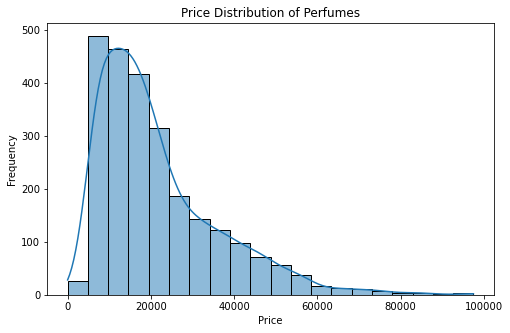

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Price Distribution of Perfumes")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

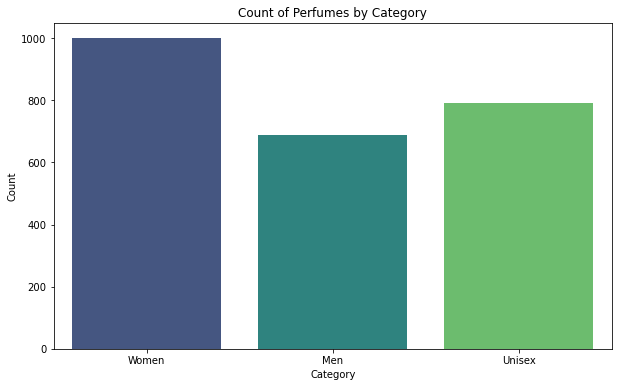

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', palette='viridis')
plt.title('Count of Perfumes by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

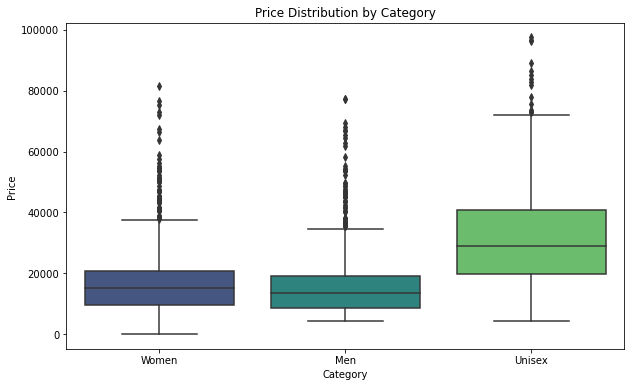

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='price', palette='viridis')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

In [107]:
# Split the 'top', 'middle', and 'base' columns by commas
df['top_notes'] = df['top'].str.split(',')
df['middle_notes'] = df['middle'].str.split(',')
df['base_notes'] = df['base'].str.split(',')

In [108]:
# Remove any leading or trailing whitespace from each note
df['top_notes'] = df['top_notes'].apply(lambda x: [note.strip() for note in x] if isinstance(x, list) else [])
df['middle_notes'] = df['middle_notes'].apply(lambda x: [note.strip() for note in x] if isinstance(x, list) else [])
df['base_notes'] = df['base_notes'].apply(lambda x: [note.strip() for note in x] if isinstance(x, list) else [])

In [109]:
# Combine all notes into a single list per perfume
df['all_notes'] = df['top_notes'] + df['middle_notes'] + df['base_notes']

In [110]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the one-hot encoder
mlb = MultiLabelBinarizer()

# Fit and transform the 'all_notes' column
note_features = mlb.fit_transform(df['all_notes'])

# Create a DataFrame with the one-hot encoded notes
note_features_df = pd.DataFrame(note_features, columns=mlb.classes_)

# Concatenate the one-hot encoded notes back to the original DataFrame
df = pd.concat([df, note_features_df], axis=1)

In [111]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [112]:
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(category_mapping)

{'Men': 0, 'Unisex': 1, 'Women': 2}


In [113]:
# One-hot encode the 'category' column
df = pd.get_dummies(df, columns=['category'], prefix='category')

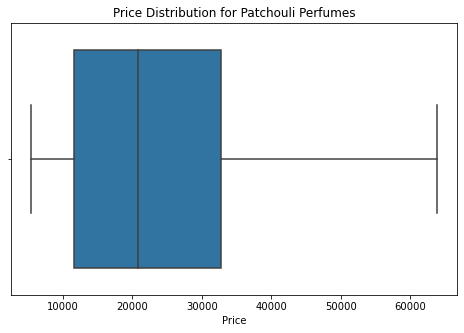

In [114]:
# Filter perfumes containing a specific note and plot their prices
Patchouli_perfumes = df[df['all_notes'].apply(lambda x: 'Patchouli' in x)]
plt.figure(figsize=(8, 5))
sns.boxplot(x=Patchouli_perfumes['price'])
plt.title("Price Distribution for Patchouli Perfumes")
plt.xlabel("Price")
plt.show()

In [115]:
pip install wordcloud

  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)



ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\Users\\Vero\\anaconda3\\envs\\learn-env\\Lib\\site-packages\\matplotlib\\_image.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [117]:
import pandas as pd
import random
def recommend_perfume_by_gender_and_price(gender, price_range):
    # Map gender to encoded value if necessary (create a mapping beforehand)
    gender_mapping = {'Women': 0, 'Men': 1, 'Unisex': 2}  # Example mapping, adjust based on your encoding
    encoded_gender = gender_mapping.get(gender.capitalize())  # Assuming labels are capitalized

    # Filter the DataFrame by gender (make sure to use the correct encoded column)
    filtered_df = df[df['category_encoded'] == encoded_gender]

    # Further filter by price range
    min_price, max_price = price_range
    filtered_df = filtered_df[(filtered_df['price'] >= min_price) & (filtered_df['price'] <= max_price)]

    # Check if any perfumes are found
    if filtered_df.empty:
        return "No perfumes found for the given criteria."
    
    # Randomly recommend a perfume from the filtered list
    recommended_perfume = filtered_df.sample(n=1)
    return recommended_perfume[['title', 'price', 'category_encoded']]

# User input example
user_gender = input("Enter your gender (Women, Men, Unisex): ")
user_min_price = float(input("Enter your minimum price: "))
user_max_price = float(input("Enter your maximum price: "))

# Call the recommendation function
recommended = recommend_perfume_by_gender_and_price(user_gender, (user_min_price, user_max_price))

# Display the recommendation
print(recommended)

                                                 title  price  \
328  Elizabeth Arden, Green Tea Nectarine Blossom E...   4300   

     category_encoded  
328                 2  
